In [3]:
from sys import argv
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import svm
from sklearn.metrics import RocCurveDisplay, accuracy_score, confusion_matrix, PrecisionRecallDisplay, ConfusionMatrixDisplay, make_scorer, precision_score,recall_score
from sklearn.model_selection import train_test_split, LeavePGroupsOut, GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.inspection import permutation_importance
complete_features=[
        "AF1",
        "AF2",
        "AF3",
        "AF4",
        "AF5",
        "BLOSUM1",
        "BLOSUM2",
        "BLOSUM3",
        "BLOSUM4",
        "BLOSUM5",
        "BLOSUM6",
        "BLOSUM7",
        "BLOSUM8",
        "BLOSUM9",
        "BLOSUM10",
        "PP1",
        "PP2",
        "PP3",
        "F1",
        "F2",
        "F3",
        "F4",
        "F5",
        "F6",
        "KF1",
        "KF2",
        "KF3",
        "KF4",
        "KF5",
        "KF6",
        "KF7",
        "KF8",
        "KF9",
        "KF10",
        "MSWHIM1",
        "MSWHIM2",
        "MSWHIM3",
        "E1",
        "E2",
        "E3",
        "E4",
        "E5",
        "PD1",
        "PD2",
        "PRIN1",
        "PRIN2",
        "PRIN3",
        "ProtFP1",
        "ProtFP2",
        "ProtFP3",
        "ProtFP4",
        "ProtFP5",
        "ProtFP6",
        "ProtFP7",
        "ProtFP8",
        "SV1",
        "SV2",
        "SV3",
        "SV4",
        "ST1",
        "ST2",
        "ST3",
        "ST4",
        "ST5",
        "ST6",
        "ST7",
        "ST8",
        "SVGER1",
        "SVGER2",
        "SVGER3",
        "SVGER4",
        "SVGER5",
        "SVGER6",
        "SVGER7",
        "SVGER8",
        "SVGER9",
        "SVGER10",
        "SVGER11",
        "T1",
        "T2",
        "T3",
        "T4",
        "T5",
        "VHSE1",
        "VHSE2",
        "VHSE3",
        "VHSE4",
        "VHSE5",
        "VHSE6",
        "VHSE7",
        "VHSE8",
        "VSTPV1",
        "VSTPV2",
        "VSTPV3",
        "VSTPV4",
        "VSTPV5",
        "VSTPV6",
        "Z1",
        "Z2",
        "Z3",
        "Z4",
        "Z5",
        "cys30",
        "cys20",
        "cys_ser30",
        "cys_ser20",
        "charge",
        "avgcharge",
        "avghydrop",
        "length",
        "entropy",
        "entropyratio",
        "boman",
        "instability",
        "aliphatic",
        "A",
        "R",
        "N",
        "D",
        "C",
        "E",
        "Q",
        "G",
        "H",
        "I",
        "L",
        "K",
        "M",
        "F",
        "P",
        "S",
        "T",
        "W",
        "Y",
        "V",
        "RHK",
        "DE",
        "STNQ",
        "CGP",
        "AVIL",
        "MFYW",
    ]

original_features=[
        "cys30",
        "cys20",
        "cys_ser30",
        "cys_ser20",
        "charge",
        "avgcharge",
        "avghydrop",
        "length",
        "entropy",
        "entropyratio",
        "boman",
        "instability",
        "aliphatic",
        "A",
        "R",
        "N",
        "D",
        "C",
        "E",
        "Q",
        "G",
        "H",
        "I",
        "L",
        "K",
        "M",
        "F",
        "P",
        "S",
        "T",
        "W",
        "Y",
        "V",
        "RHK",
        "DE",
        "STNQ",
        "CGP",
        "AVIL",
        "MFYW"
    ]
feature_selection=['RHK','R','H','K','avghydrop','length','BLOSUM7','PP2','F3','F6','MSWHIM3','E4','PD1','PRIN3','ProtFP5','SV3','SV4','ST7','T3','VHSE5',"cys30",
        "cys20",
        "cys_ser30",
        "cys_ser20",
        "charge",
        "avgcharge"]
ripp_classes=['Guanidinotide',
              'Cyanobactin',
              'Thiopeptide',
              'TBA', 
              'Pearlin',
              'Ryptide',
              'Glycocin', 
              'Borosin',
              'Microcin', 
              'Head-to-tail cyclized peptide',
              'Pantocin', 
              'other',
              'Bottromycin',
              'Mycofactocin',
              'Cyptide', 
              'Streptide', 
              'Epipeptide', 
              'Dikaritin',
              'Proteusin', 
              'Rotapeptide',
              'Microviridin', 
              'Methanobactin', 
              'Ranthipeptide', 
              'Thioamitide',
              'Amatoxin',
              'Cyclotide',
              'Sulfatyrotide',
              'AIP',
              'Selidamide',
              'Graspetide', 
              'Crocagin', 
              'N-Formylated TBA', 
              'Linear azole-containing peptide', 
              'Lanthipeptide',
              'Lasso', 
              'Sactipeptide',
              'Bacteriocin', 
              'Lyciumin',
              'Linaridin']

In [2]:
def svm_training_split(dataset_file,feature_list):
    dataset = pd.read_csv(dataset_file)
    dataset = dataset.drop(labels="sequence", axis=1)
    x = dataset[feature_list]
    y = dataset[["RiPP"]].to_numpy().ravel()
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2,random_state=42)
    return x_train, x_test, y_train, y_test

def class_split_iterable(dataset,class_list):
    custom_cv=[]
    for category in class_list:
        positive_indices=dataset[dataset['Class'].str.contains(category, na=False)].index.tolist()
        negative_indices = dataset[dataset['Class'].str.contains('No_RiPP', na=False)].index.tolist()
        sample_size = min(len(positive_indices)*40, len(negative_indices))  # Handle cases with fewer matches
        random_indices = random.sample(negative_indices, sample_size)
        validation_indices=positive_indices+random_indices
        all_indices = dataset.index.tolist()
        training_indices = list(set(all_indices) - set(validation_indices))
        training_indices.sort()
        validation_indices.sort()
        custom_cv.append((tuple(training_indices),tuple(validation_indices)))
    return custom_cv


def x_and_y(dataset,feature_list):
    dataset = dataset.drop(labels=["sequence","Class"], axis=1)
    x = dataset[feature_list]
    y = dataset[["RiPP"]].to_numpy().ravel()
    return x,y

def f_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp, names, strict=False)), strict=False)
    fig=plt.figure(figsize=(5,5),dpi=300)
    plt.barh(range(len(names)), imp, align="center")
    plt.yticks(range(len(names)), names, fontsize=3)
    plt.title('Feature coefficients')
    plt.show()
    
def svc_classification(x_train, x_test, y_train, y_test,feature_list):
    for i in range(1,8):
            poly_svc = svm.SVC(C=10,kernel="poly",random_state=0,degree=i,class_weight={'RiPP':10, 'No_RiPP':0.5})
            poly_svc.fit(x_train, y_train)
            #f_importances(abs(poly_svc.coef_[0]),feature_list)
            y_pred = poly_svc.predict(x_test)
            print(
                pd.DataFrame(
                    confusion_matrix(y_test, y_pred),
                    index=poly_svc.classes_,
                    columns=poly_svc.classes_,
                )
            )
            fig,axes=plt.subplots(1,3,figsize=(15,5))
            RocCurveDisplay.from_estimator(
                poly_svc, x_test, y_test, name="Validation data", ax=axes[0], alpha=0.8
            )
            RocCurveDisplay.from_estimator(poly_svc,x_train,y_train,name='Training data', ax=axes[0],alpha=0.8)
            axes[0].set_title('ROC Curve')
            #plt.show()
            
            PrecisionRecallDisplay.from_estimator(poly_svc,x_test,y_test,name='Validation data',ax=axes[1], alpha=0.8)
            PrecisionRecallDisplay.from_estimator(poly_svc,x_train,y_train,name='Training data',ax=axes[1], alpha=0.8)
            axes[1].set_title('Precision-Recall Curve')
            #plt.show()
            
            ConfusionMatrixDisplay.from_estimator(poly_svc,x_test,y_test,ax=axes[2])
            axes[2].set_title('Confusion matrix')
            
            fig.suptitle(f'SVM with degree {i}')
            plt.tight_layout()
            plt.show()
            # Compute permutation importance
            perm_importance = permutation_importance(poly_svc, x_test, y_test, n_repeats=10, scoring='accuracy', random_state=42,n_jobs=6)
            # Display feature importance
            for i in perm_importance.importances_mean.argsort()[::-1]:
                print(f"Feature {feature_list[i]}: {perm_importance.importances_mean[i]:.3f} ± {perm_importance.importances_std[i]:.3f}")
                
            #print("Feature Importance:", feature_importance)

Grid search and cross validation of different parameters:

Fitting 39 folds for each of 18 candidates, totalling 702 fits


/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/lustre/BIF/nobackup/sanz006/miniforge3/envs/ripp/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

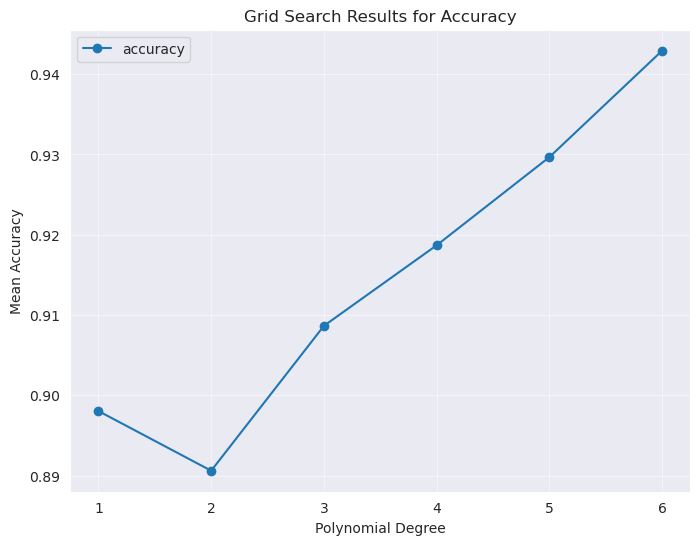

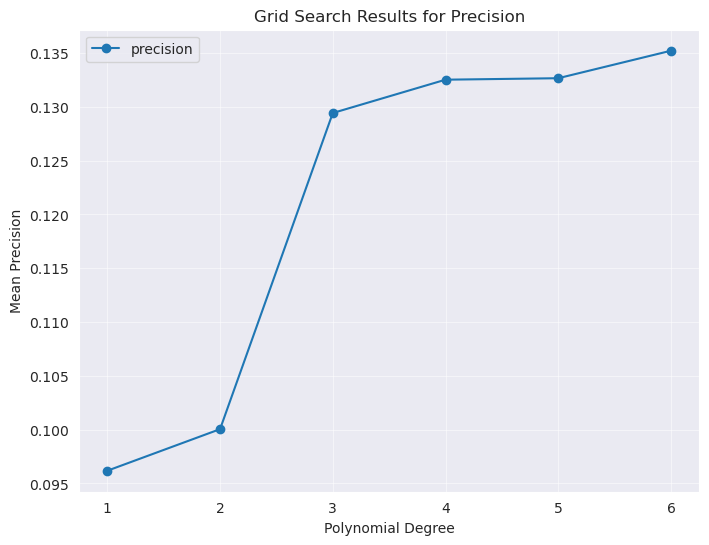

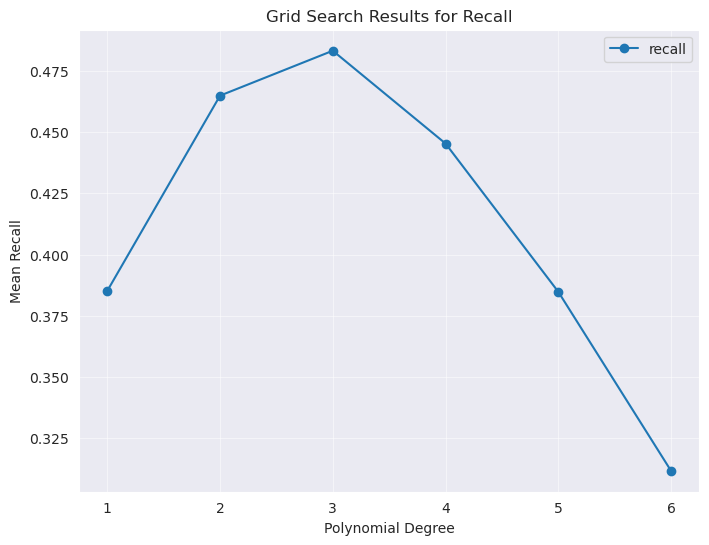

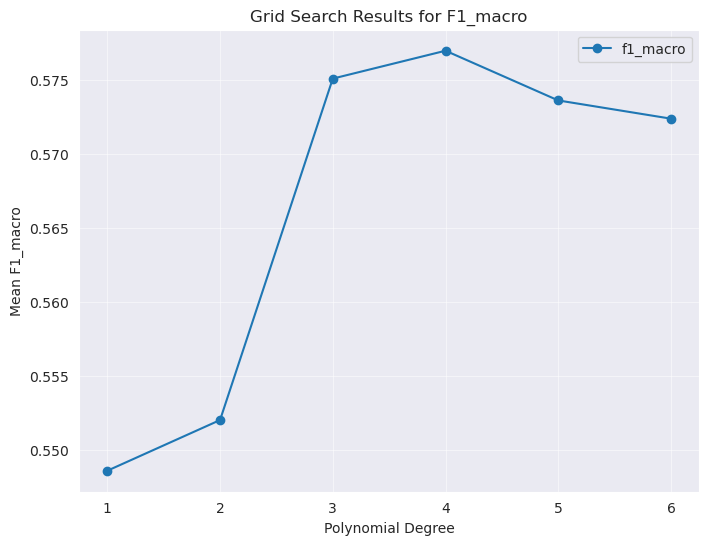

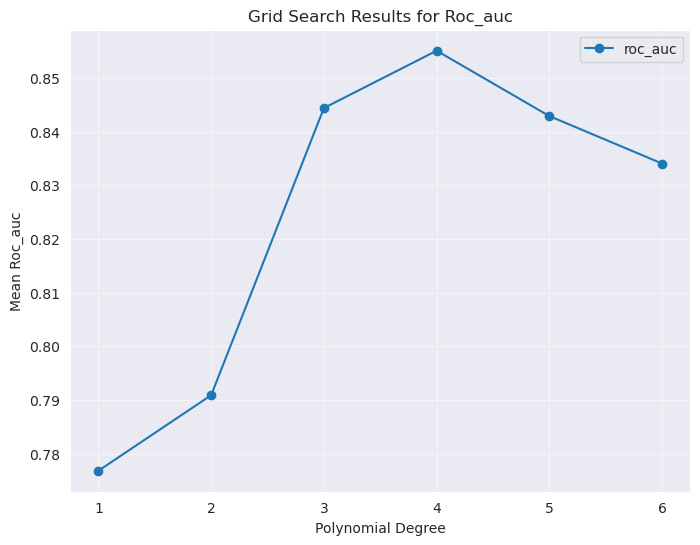

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [4]:
# Define the parameter grid
param_grid = {'degree': [1,2, 3, 4, 5,6], 'C': [0.1, 1, 10]}  # Adjust C as needed

# Initialize SVM with polynomial kernel
scoring_metrics = {
    'accuracy': 'accuracy',  # Predefined scorer
    'precision': make_scorer(precision_score, pos_label='RiPP'),
    'recall': make_scorer(recall_score, pos_label='RiPP'),
    'f1_macro': 'f1_macro',  # Predefined scorer
    'roc_auc': 'roc_auc'  # Predefined scorer
}
poly_svm = svm.SVC(kernel='poly',class_weight={'RiPP':10, 'No_RiPP':0.5})
dataset= pd.read_csv('/lustre/BIF/nobackup/sanz006/training_dataset.csv')
x,y=x_and_y(dataset,complete_features)
my_cv=class_split_iterable(dataset,ripp_classes)
# Perform GridSearchCV
grid_search = GridSearchCV(estimator=poly_svm, param_grid=param_grid, cv=my_cv, scoring=scoring_metrics, verbose=1, n_jobs=20,refit=False)
grid_search.fit(x, y)

# Extract results
results = grid_search.cv_results_
degrees = param_grid['degree']
c= param_grid['C']
for metric in scoring_metrics.keys():
    mean_test_scores = []
    for degree in degrees:
        indices = [
            idx for idx, params in enumerate(results['params']) if params['degree'] == degree
        ]
        mean_test_scores.append(np.mean([results[f'mean_test_{metric}'][idx] for idx in indices]))
    
    # Plot for the current metric
    plt.figure(figsize=(8, 6))
    plt.plot(degrees, mean_test_scores, marker='o', linestyle='-', label=metric)
    plt.xlabel('Polynomial Degree')
    plt.ylabel(f'Mean {metric.capitalize()}')
    plt.title(f'Grid Search Results for {metric.capitalize()}')
    plt.xticks(degrees)
    plt.grid(alpha=0.5)
    plt.legend()
    plt.show()


Old algorithm (done with 80/20 split):

         No_RiPP  RiPP
No_RiPP     3672   329
RiPP          29    71


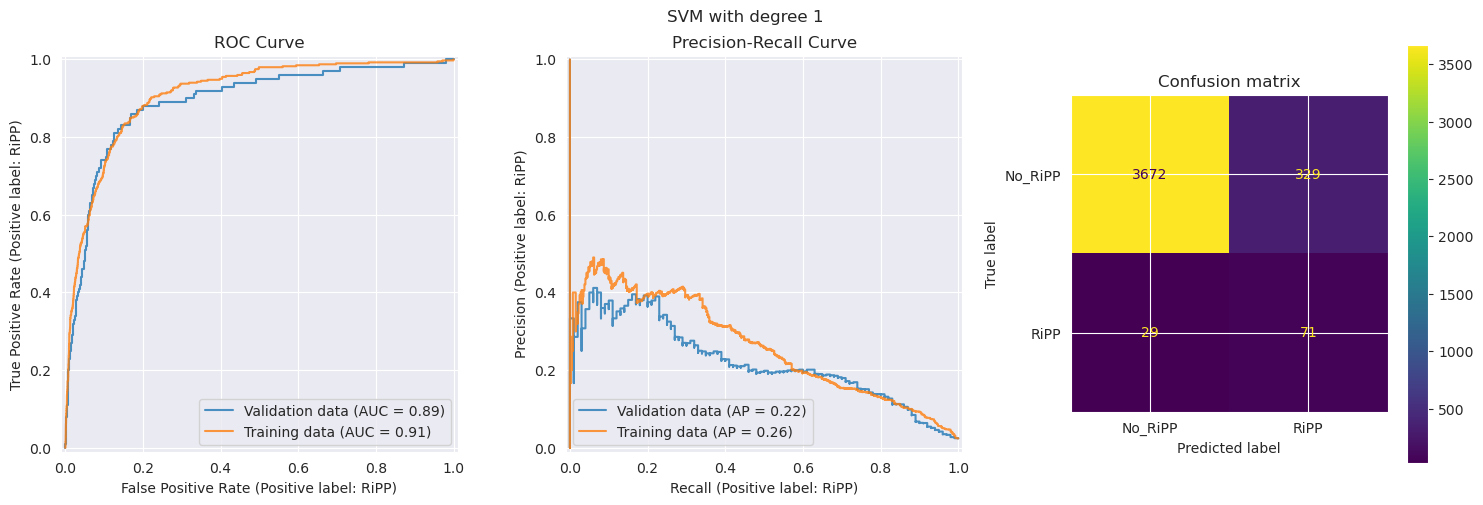

Feature length: 0.057 ± 0.003
Feature aliphatic: 0.025 ± 0.003
Feature boman: 0.008 ± 0.003
Feature SVGER11: 0.004 ± 0.002
Feature PRIN1: 0.003 ± 0.001
Feature ProtFP3: 0.003 ± 0.001
Feature ST6: 0.002 ± 0.001
Feature instability: 0.002 ± 0.003
Feature SVGER8: 0.002 ± 0.001
Feature ProtFP7: 0.002 ± 0.001
Feature ProtFP1: 0.002 ± 0.001
Feature T2: 0.001 ± 0.000
Feature SVGER4: 0.001 ± 0.001
Feature ST8: 0.001 ± 0.000
Feature BLOSUM7: 0.001 ± 0.001
Feature PP1: 0.001 ± 0.000
Feature VSTPV6: 0.001 ± 0.000
Feature SVGER6: 0.001 ± 0.001
Feature F2: 0.000 ± 0.000
Feature AF3: 0.000 ± 0.000
Feature PD2: 0.000 ± 0.000
Feature VHSE4: 0.000 ± 0.000
Feature entropyratio: 0.000 ± 0.000
Feature AF4: 0.000 ± 0.000
Feature SVGER5: 0.000 ± 0.001
Feature ProtFP8: 0.000 ± 0.000
Feature KF6: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature VSTPV4: 0.000 ± 0.000
Feature KF5: 0.000 ± 0.001
Feature BLOSUM2: 0.000 ± 0.000
Feature BLOSUM8: 0.000 ± 0.000
Feature ST5: 0.000 ± 0.000
Feature MSWHIM1: 0.000 

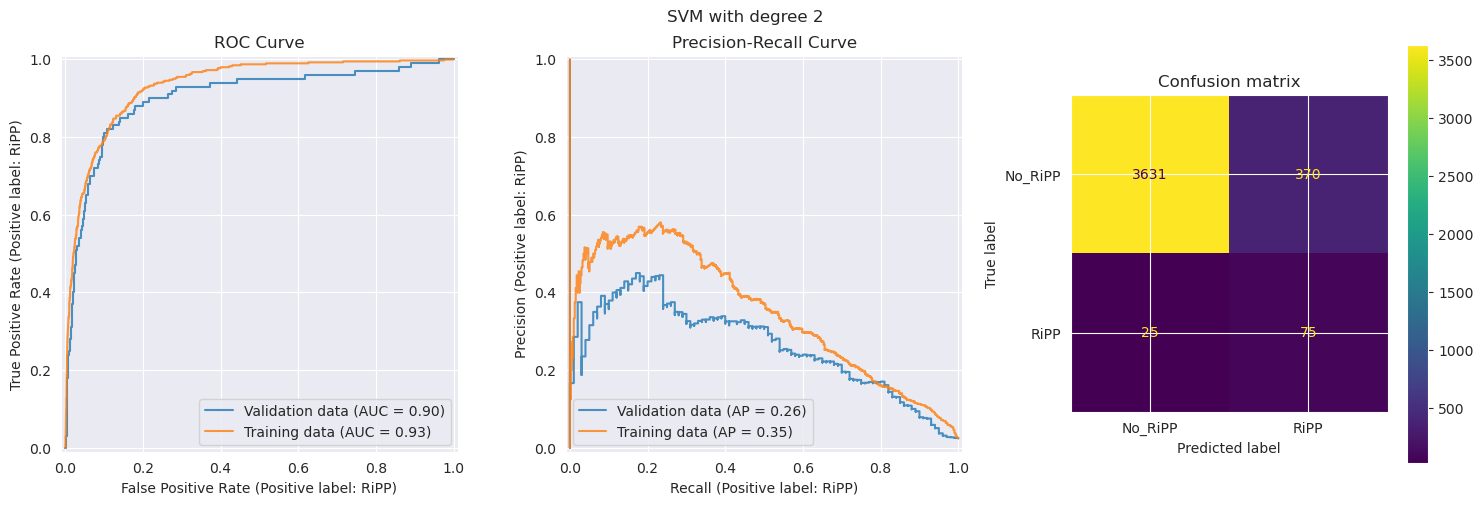

Feature length: 0.117 ± 0.002
Feature aliphatic: 0.105 ± 0.004
Feature instability: 0.021 ± 0.003
Feature charge: 0.008 ± 0.003
Feature PRIN1: 0.005 ± 0.001
Feature ProtFP1: 0.002 ± 0.001
Feature Z5: 0.001 ± 0.001
Feature KF5: 0.001 ± 0.001
Feature BLOSUM8: 0.001 ± 0.000
Feature Z1: 0.001 ± 0.000
Feature AF4: 0.001 ± 0.000
Feature PP1: 0.001 ± 0.000
Feature VSTPV4: 0.000 ± 0.000
Feature AF2: 0.000 ± 0.000
Feature PD2: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature ST5: 0.000 ± 0.000
Feature BLOSUM5: 0.000 ± 0.000
Feature SVGER4: 0.000 ± 0.001
Feature ST6: 0.000 ± 0.000
Feature T2: 0.000 ± 0.000
Feature cys_ser30: 0.000 ± 0.000
Feature VSTPV6: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature SVGER3: 0.000 ± 0.000
Feature AF3: 0.000 ± 0.000
Feature ProtFP7: 0.000 ± 0.000
Feature cys20: 0.000 ± 0.000
Feature BLOSUM3: 0.000 ± 0.000
Feature F2: 0.000 ± 0.000
Feature KF6: 0.000 ± 0.000
Feature F4: 0.000 ± 0.000
Feature SVGER2: 0.000 ± 0.000
Feature VHSE6: 0.000 ± 0.000
Feature SVGER

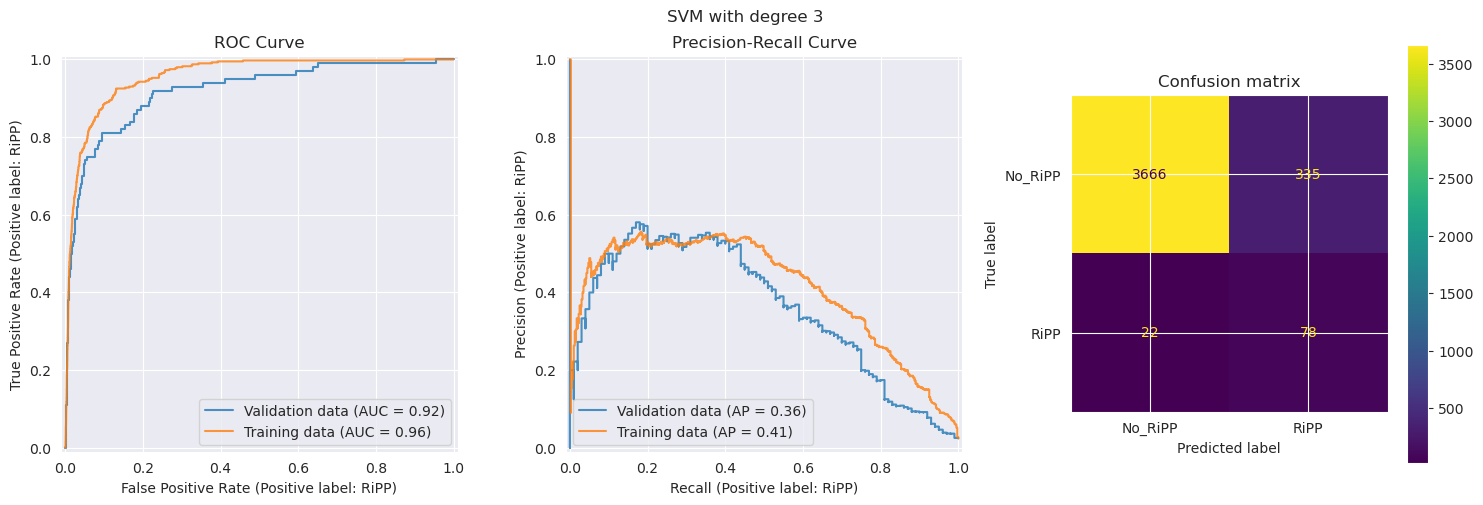

Feature length: 0.067 ± 0.003
Feature aliphatic: 0.031 ± 0.002
Feature instability: 0.015 ± 0.001
Feature charge: 0.005 ± 0.003
Feature PRIN1: 0.001 ± 0.001
Feature cys_ser20: 0.001 ± 0.000
Feature PD2: 0.001 ± 0.000
Feature KF5: 0.000 ± 0.000
Feature Z1: 0.000 ± 0.000
Feature AF2: 0.000 ± 0.000
Feature cys_ser30: 0.000 ± 0.000
Feature BLOSUM5: 0.000 ± 0.000
Feature ST6: 0.000 ± 0.000
Feature F2: 0.000 ± 0.000
Feature MSWHIM1: 0.000 ± 0.000
Feature cys20: 0.000 ± 0.000
Feature T5: 0.000 ± 0.000
Feature VSTPV5: 0.000 ± 0.000
Feature KF1: 0.000 ± 0.000
Feature F3: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature BLOSUM6: 0.000 ± 0.000
Feature T4: 0.000 ± 0.000
Feature ProtFP5: 0.000 ± 0.000
Feature BLOSUM2: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature SVGER4: 0.000 ± 0.001
Feature AF4: 0.000 ± 0.000
Feature KF10: 0.000 ± 0.000
Feature VHSE6: 0.000 ± 0.000
Feature Z5: 0.000 ± 0.000
Feature VSTPV3: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature F1: 0.000 ± 0.000
Feature KF6: 0.000 ± 0.0

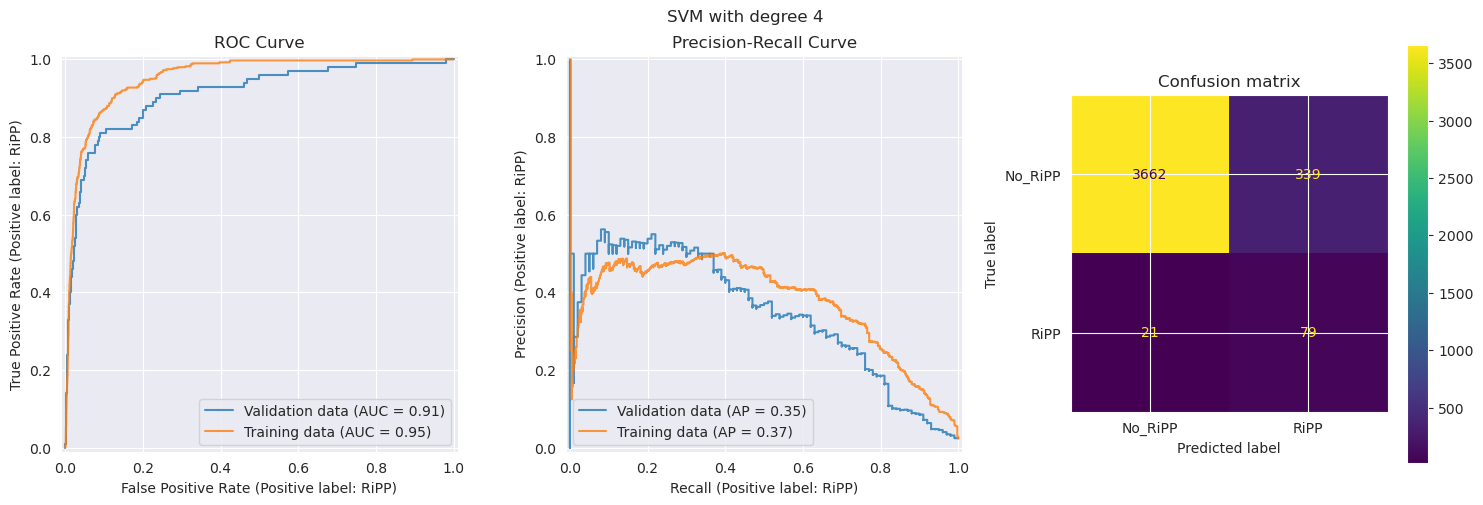

Feature length: 0.075 ± 0.003
Feature aliphatic: 0.029 ± 0.002
Feature instability: 0.015 ± 0.002
Feature charge: 0.009 ± 0.002
Feature PRIN1: 0.001 ± 0.001
Feature SVGER4: 0.000 ± 0.000
Feature ST8: 0.000 ± 0.000
Feature KF5: 0.000 ± 0.000
Feature KF6: 0.000 ± 0.000
Feature VHSE1: 0.000 ± 0.000
Feature SVGER6: 0.000 ± 0.000
Feature KF4: 0.000 ± 0.000
Feature ST6: 0.000 ± 0.000
Feature BLOSUM2: 0.000 ± 0.000
Feature ST7: 0.000 ± 0.000
Feature F1: 0.000 ± 0.000
Feature KF3: 0.000 ± 0.000
Feature PP1: 0.000 ± 0.000
Feature ST2: 0.000 ± 0.000
Feature BLOSUM7: 0.000 ± 0.000
Feature ProtFP3: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature MSWHIM1: 0.000 ± 0.000
Feature BLOSUM1: 0.000 ± 0.000
Feature ST4: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature T4: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature E3: 0.000 ± 0.000
Feature SV1: 0.000 ± 0.000
Feature MSWHIM2: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature BLOSUM9: 0.000 ± 0.000
Feat

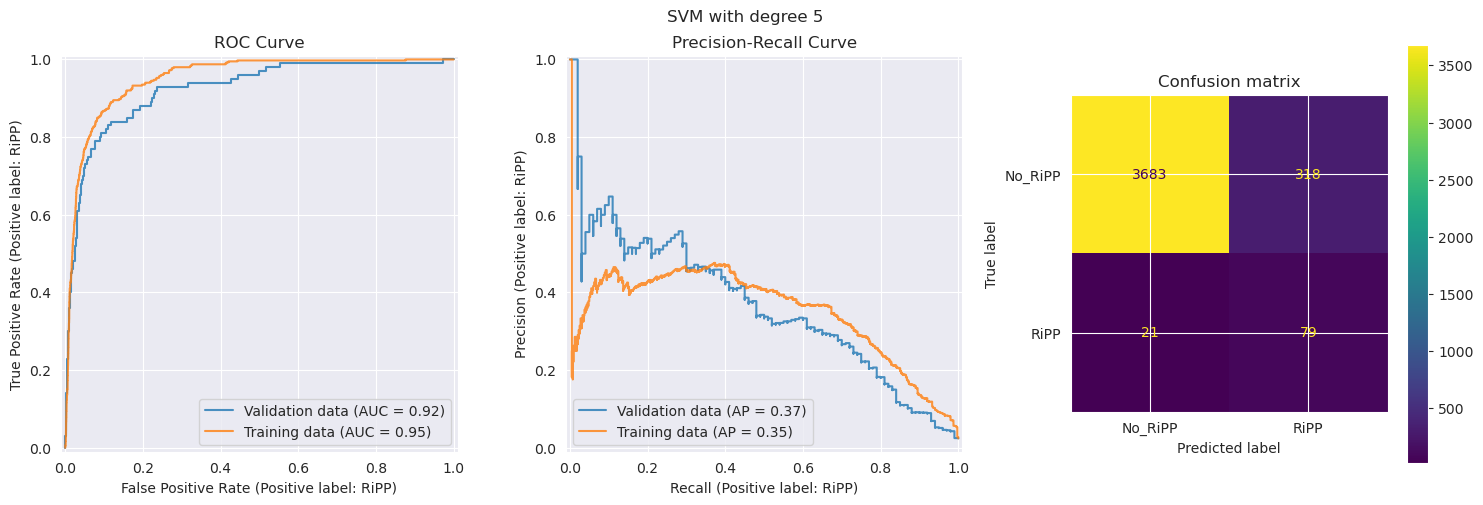

Feature length: 0.073 ± 0.002
Feature aliphatic: 0.027 ± 0.002
Feature instability: 0.014 ± 0.002
Feature charge: 0.011 ± 0.002
Feature PRIN1: 0.001 ± 0.001
Feature ProtFP5: 0.000 ± 0.000
Feature Z5: 0.000 ± 0.000
Feature VHSE7: 0.000 ± 0.000
Feature AF4: 0.000 ± 0.000
Feature SVGER4: 0.000 ± 0.000
Feature ST8: 0.000 ± 0.000
Feature SVGER2: 0.000 ± 0.000
Feature KF8: 0.000 ± 0.000
Feature BLOSUM3: 0.000 ± 0.000
Feature SVGER3: 0.000 ± 0.000
Feature F4: 0.000 ± 0.000
Feature cys_ser30: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature VHSE6: 0.000 ± 0.000
Feature ST6: 0.000 ± 0.000
Feature AF3: 0.000 ± 0.000
Feature cys20: 0.000 ± 0.000
Feature ProtFP8: 0.000 ± 0.000
Feature BLOSUM5: 0.000 ± 0.000
Feature ProtFP6: 0.000 ± 0.000
Feature KF1: 0.000 ± 0.000
Feature BLOSUM8: 0.000 ± 0.000
Feature VHSE4: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature SVGER5: 0.000 ± 0.000
Feature KF6: 0.000 ± 0.000
Feature F2: 0.000 ± 0.000
Feature VSTPV2: 0.000 ± 0.000
Feature SV4: 0.000 ± 0.000
Fea

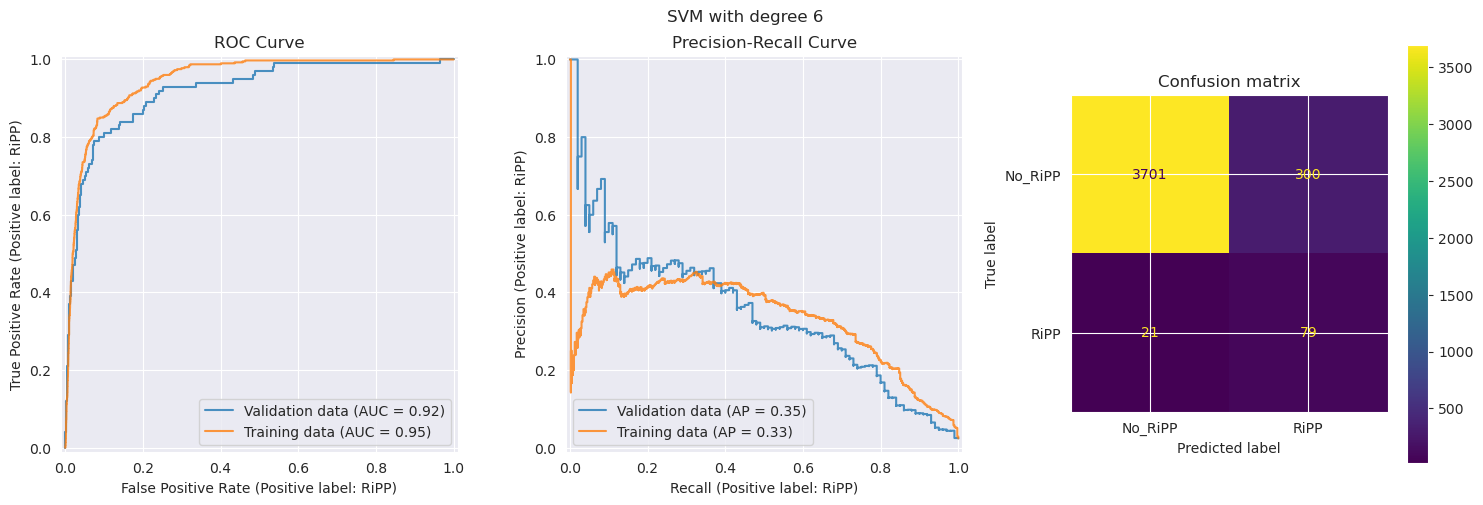

Feature length: 0.068 ± 0.002
Feature instability: 0.015 ± 0.004
Feature charge: 0.013 ± 0.002
Feature aliphatic: 0.010 ± 0.002
Feature PRIN1: 0.002 ± 0.001
Feature ProtFP1: 0.001 ± 0.001
Feature Z1: 0.001 ± 0.000
Feature SVGER8: 0.001 ± 0.000
Feature SVGER3: 0.000 ± 0.000
Feature ProtFP3: 0.000 ± 0.000
Feature KF1: 0.000 ± 0.000
Feature F2: 0.000 ± 0.000
Feature AF2: 0.000 ± 0.000
Feature VSTPV5: 0.000 ± 0.000
Feature PD2: 0.000 ± 0.000
Feature cys20: 0.000 ± 0.000
Feature F4: 0.000 ± 0.000
Feature KF6: 0.000 ± 0.000
Feature BLOSUM10: 0.000 ± 0.000
Feature ProtFP5: 0.000 ± 0.000
Feature VHSE6: 0.000 ± 0.000
Feature KF8: 0.000 ± 0.000
Feature ProtFP6: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature VSTPV2: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature ProtFP8: 0.000 ± 0.000
Feature VSTPV6: 0.000 ± 0.000
Feature AF4: 0.000 ± 0.000
Feature cys30: 0.000 ± 0.000
Feature PP1: 0.000 ± 0.000
Feature VHSE1: 0.000 ± 0.000
Feature entropyratio: 0.000 ± 0.000
Feature SVGER5: 0.000 ± 0.0

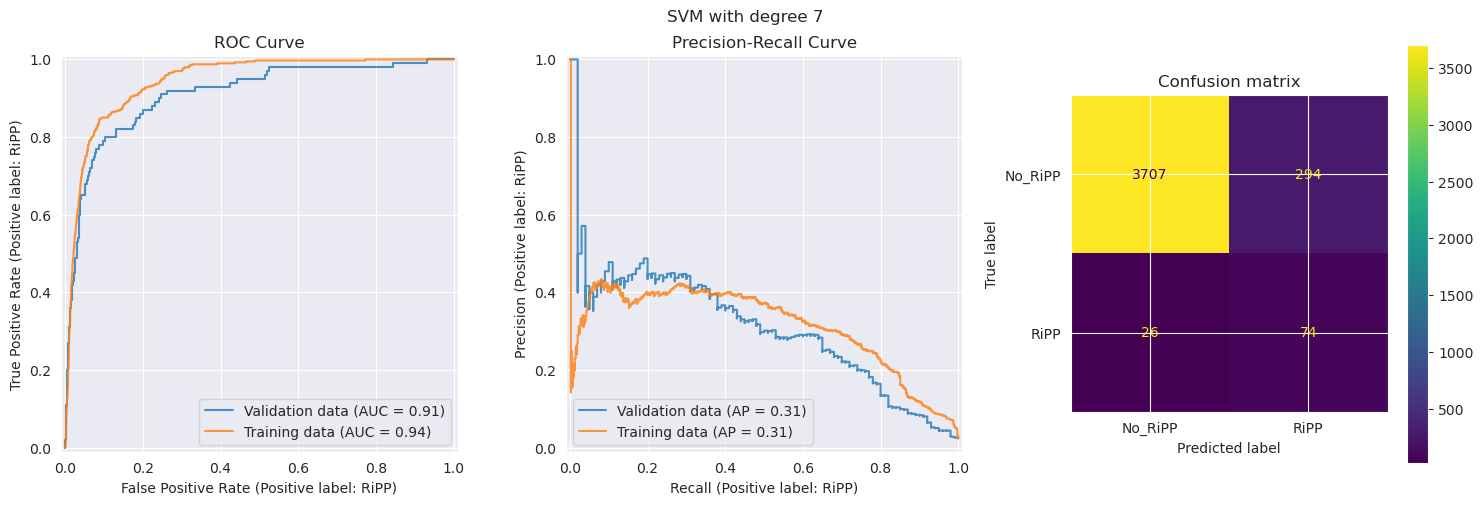

Feature length: 0.066 ± 0.002
Feature instability: 0.016 ± 0.004
Feature charge: 0.013 ± 0.002
Feature aliphatic: 0.005 ± 0.003
Feature PRIN1: 0.003 ± 0.001
Feature ProtFP1: 0.001 ± 0.000
Feature AF2: 0.000 ± 0.000
Feature SVGER4: 0.000 ± 0.000
Feature KF1: 0.000 ± 0.000
Feature ProtFP7: 0.000 ± 0.000
Feature SVGER8: 0.000 ± 0.000
Feature BLOSUM7: 0.000 ± 0.000
Feature F2: 0.000 ± 0.000
Feature SVGER3: 0.000 ± 0.000
Feature SVGER6: 0.000 ± 0.000
Feature ProtFP3: 0.000 ± 0.000
Feature Z4: 0.000 ± 0.000
Feature T4: 0.000 ± 0.000
Feature VHSE8: 0.000 ± 0.000
Feature BLOSUM2: 0.000 ± 0.000
Feature ProtFP8: 0.000 ± 0.000
Feature F5: 0.000 ± 0.000
Feature VSTPV1: 0.000 ± 0.000
Feature BLOSUM4: 0.000 ± 0.000
Feature ST1: 0.000 ± 0.000
Feature VSTPV3: 0.000 ± 0.000
Feature SVGER11: 0.000 ± 0.000
Feature Z1: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature ST4: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature W: 0.000 ± 0

In [7]:
x_train, x_test, y_train, y_test = svm_training_split('/lustre/BIF/nobackup/sanz006/training_dataset.csv',feature_list=complete_features)
svc_classification(x_train, x_test, y_train, y_test,feature_list=complete_features)

Same dataset but using the original features + Boman, aliphatic and instability

         No_RiPP  RiPP
No_RiPP     3515   486
RiPP          48    52


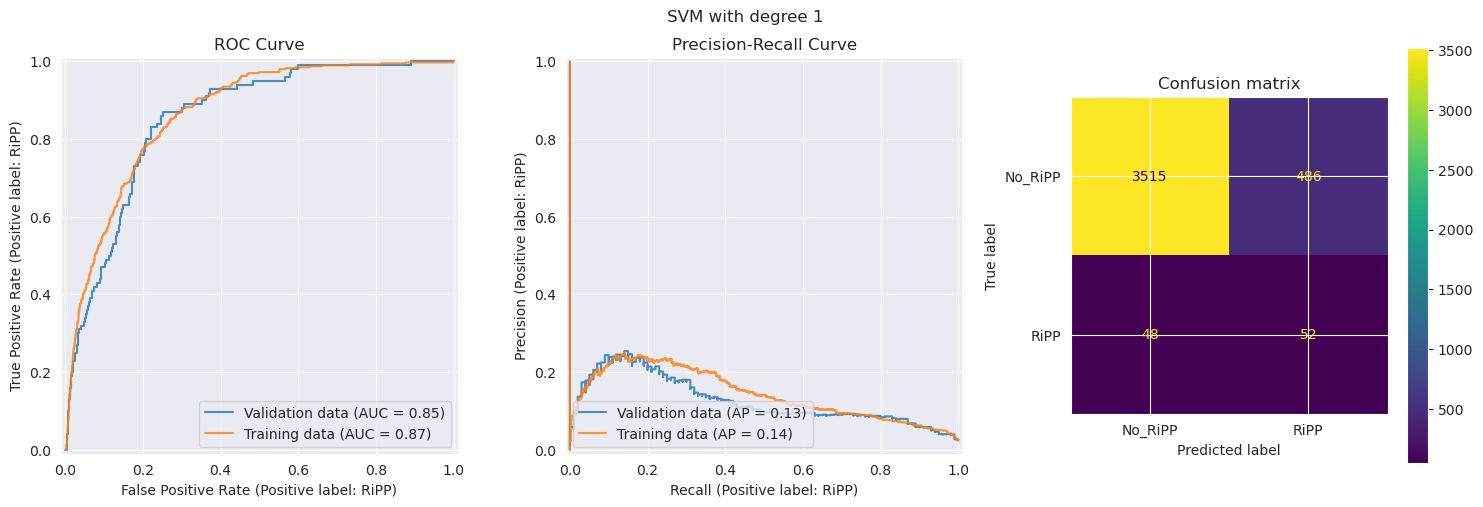

Feature length: 0.046 ± 0.003
Feature aliphatic: 0.014 ± 0.003
Feature charge: 0.008 ± 0.002
Feature instability: 0.006 ± 0.004
Feature STNQ: 0.000 ± 0.000
Feature cys_ser30: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.001
Feature MFYW: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature P: -0.000 ± 0.000
Feature D: -0.000 ± 0.000
Feature H: -0.000 ± 0.000
Feature V: -0.000 ± 0.000
Feature entropy: -0.000 ± 0.000
Feature E: -0.000 ± 0.000
Feature cys30: -0.000 ± 0.000
Feature S: -0.000 ± 0.000
Feature cys20: -0.000 ± 0.001
Feature DE: -0.000 ± 0.000
Feature C: -0.000 ± 0.000
Feature entropyratio: -0.000 ± 0.001
Feature R: -0.000 ± 0.00

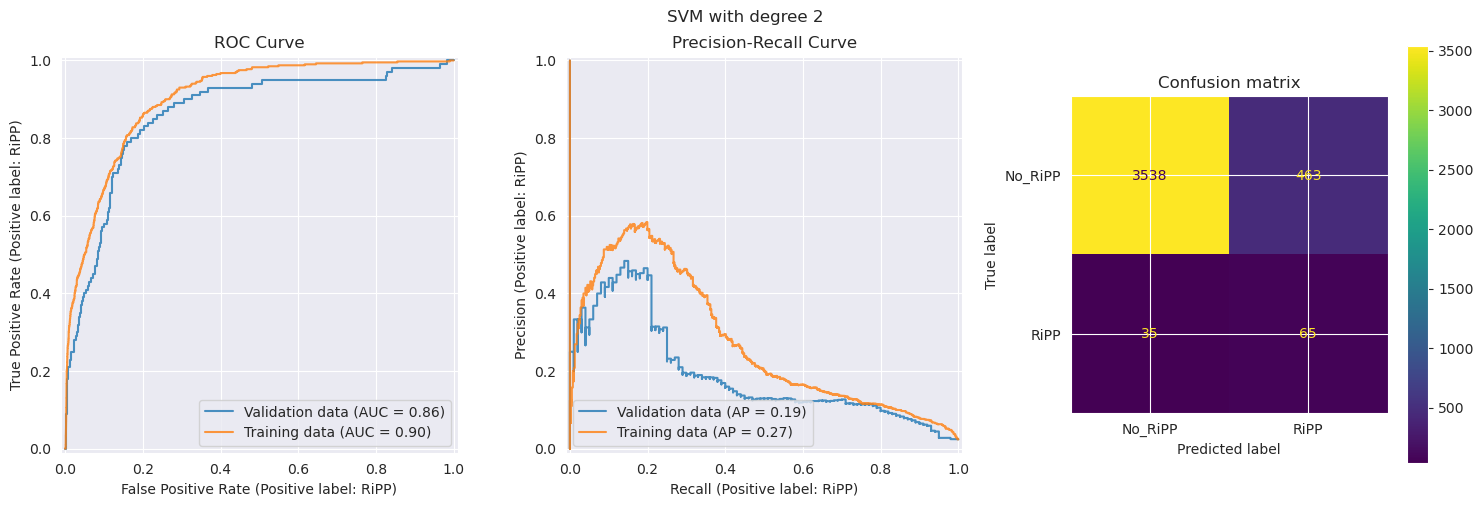

Feature aliphatic: 0.082 ± 0.005
Feature length: 0.079 ± 0.002
Feature instability: 0.038 ± 0.003
Feature charge: 0.028 ± 0.003
Feature cys_ser20: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature cys20: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature cys30: 0.000 ± 0.000
Feature cys_ser30: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature entropyratio: -0.000 ± 0.000
Feature G: -0.000 ± 0.000
Featu

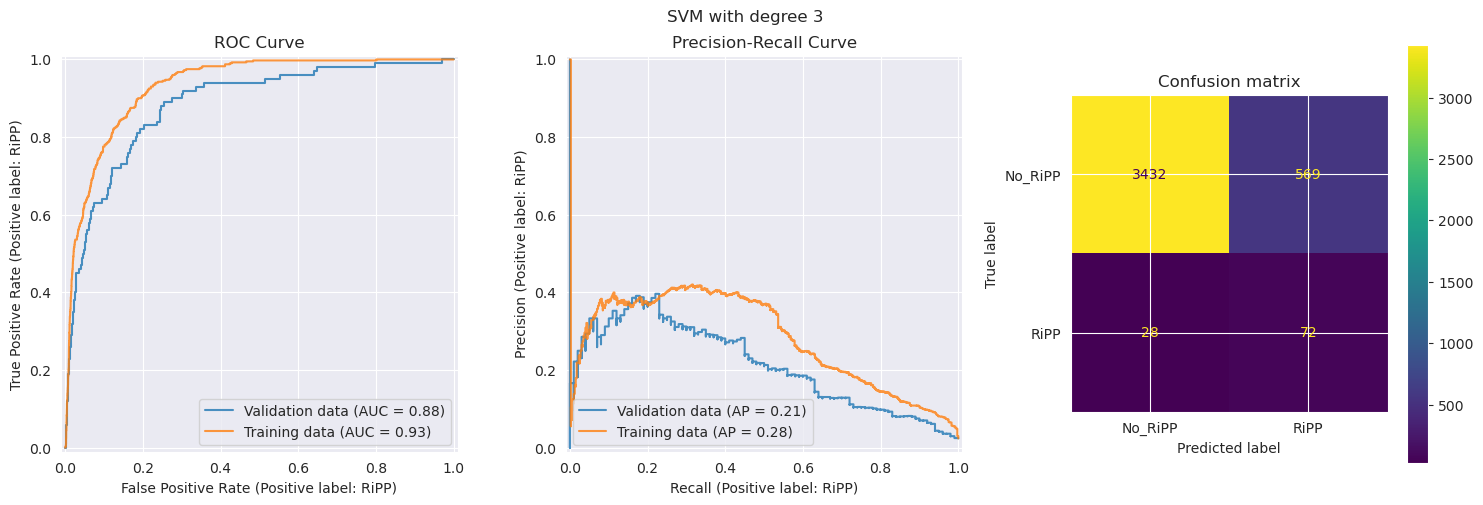

Feature instability: 0.057 ± 0.005
Feature length: 0.039 ± 0.002
Feature charge: 0.018 ± 0.003
Feature aliphatic: 0.002 ± 0.002
Feature cys_ser20: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature G: -0.000 ± 0.000
Feature cys_ser30: -0.000 ± 0.000
Feature avghydrop: -0.000 ± 0.000
Feature CGP: -0.000 ± 0.000
Feature RHK: -0.000 ± 0.000
Feature avgcharge: -0.000 ± 0.000
Feature cys30: -0.000 ± 0.000
Feature STNQ: -0.000 ± 0.000
Feature R: -0.000 ± 0.000
Feature K: -0.000 ± 0.000
Featur

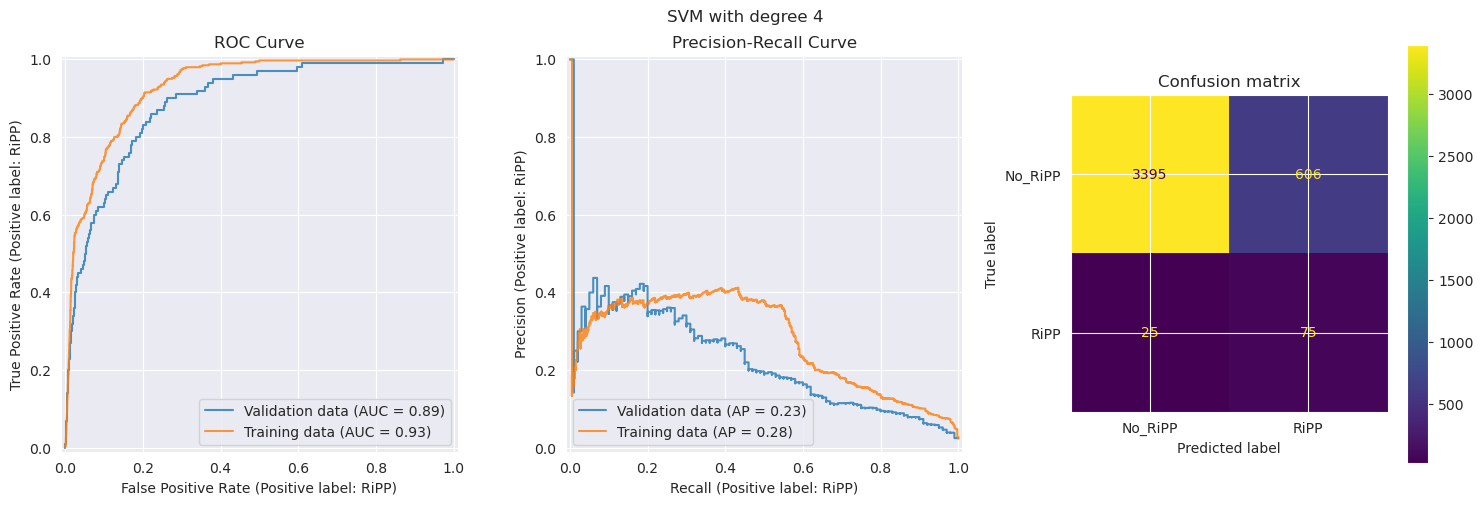

Feature instability: 0.087 ± 0.005
Feature length: 0.043 ± 0.002
Feature charge: 0.023 ± 0.003
Feature aliphatic: 0.011 ± 0.003
Feature cys_ser20: 0.000 ± 0.000
Feature cys_ser30: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature RHK: -0.000 ± 0.000
Feature cys30: -0.000 ± 0.000
Feature R: -0.000 ± 0.000
Feature entro

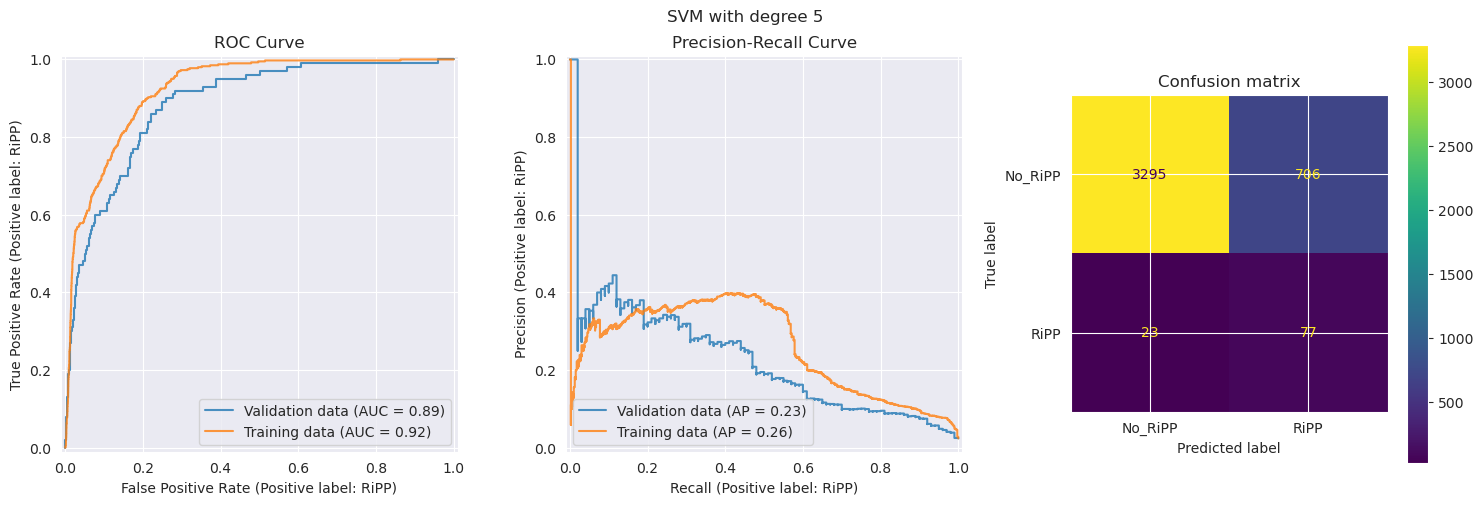

Feature instability: 0.101 ± 0.004
Feature length: 0.042 ± 0.003
Feature charge: 0.021 ± 0.002
Feature aliphatic: 0.017 ± 0.005
Feature cys_ser20: 0.001 ± 0.000
Feature cys_ser30: 0.001 ± 0.000
Feature CGP: 0.001 ± 0.000
Feature STNQ: 0.001 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature cys20: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature cys30: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature R: -

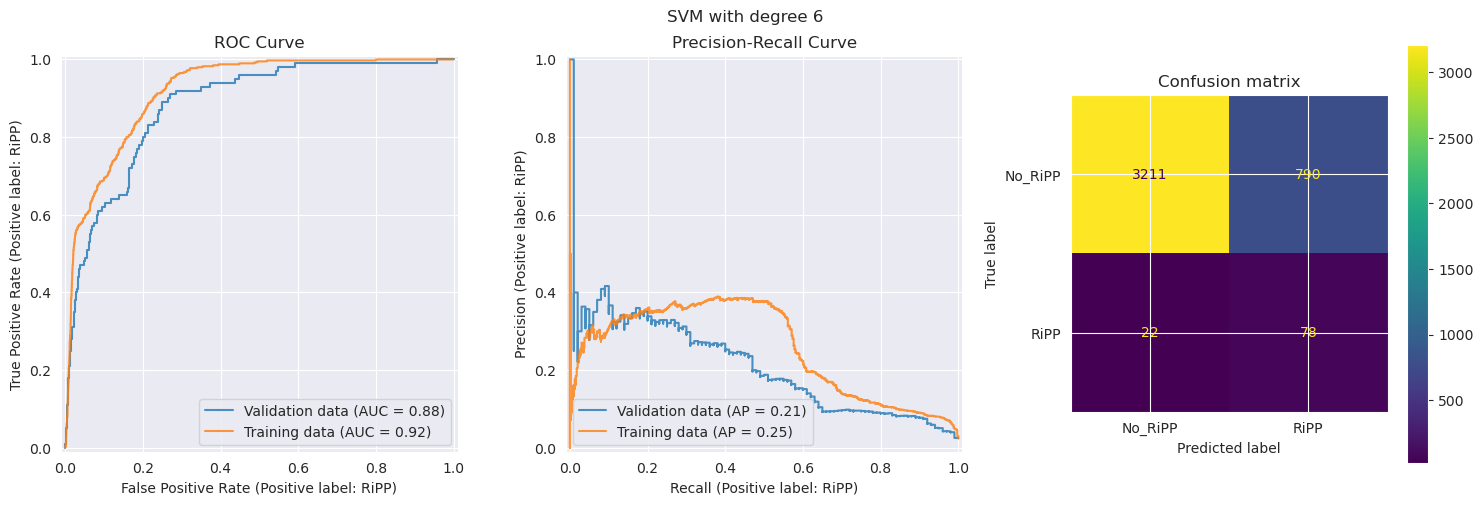

Feature instability: 0.110 ± 0.004
Feature length: 0.044 ± 0.002
Feature charge: 0.021 ± 0.002
Feature aliphatic: 0.014 ± 0.003
Feature CGP: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature cys20: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature cys30: -0.000 ± 0.000
Feature H: -0.000 ± 0.000
Feature P: -0.000 ± 0.000
Feature F: -0.000 ± 0.000
Feature MFYW: -0.000 ± 0.000
Feature avgcharge: -0.000 ± 0.000
Feature C: -0.000 ± 0.000
Feature RHK: -0.000 ± 0.000
Feature V: -0.000 ± 0.000
Feature L: -0.000 ± 0.000
Feature AVIL: -0.000 ± 0.000
Feature S: -0.000 ± 0.000
Feature R: -0.000 ± 0.000
Feature cys_ser30: -0.000 ± 0.000
Feature K: -0.000 ± 0.000
Feature avghydrop: -0.000 ± 0.000
Feature T: -0.000 ± 0.000
Feature cys_ser20: -0.000 ± 0.0

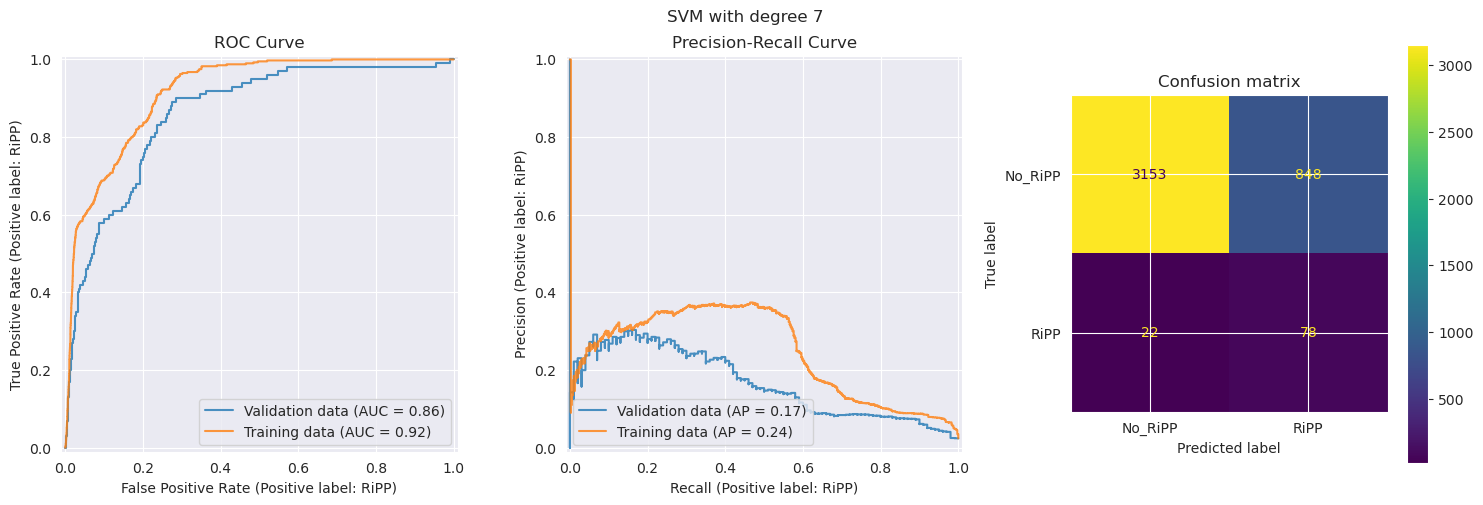

Feature instability: 0.114 ± 0.004
Feature length: 0.044 ± 0.002
Feature charge: 0.020 ± 0.003
Feature cys20: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature cys30: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature MFYW: -0.000 ± 0.000
Feature R: -0.000 ± 0.000
Feature cys_ser30: -0.000 ± 0.000
Feature STNQ: -0.000 ± 0.000
Feature entropyratio: -0.000 ± 0.000
Feature CGP: -0.000 ± 0.000
Featur

In [4]:
x_train, x_test, y_train, y_test = svm_training_split('/lustre/BIF/nobackup/sanz006/training_dataset.csv',feature_list=original_features)
svc_classification(x_train, x_test, y_train, y_test,feature_list=original_features)

Next cells will make an attempt to determine whether the increase in our dataset (500 proteins) vs the original paper (137 proteins) has had a positive effect

In [5]:
def svm_training_split_reduced(dataset_file,feature_list):
    dataset = pd.read_csv(dataset_file)
    dataset = dataset.drop(labels="sequence", axis=1)
    dataset=dataset.iloc[364:]
    x = dataset[feature_list]
    y = dataset[["RiPP"]].to_numpy().ravel()
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2,random_state=42)
    return x_train, x_test, y_train, y_test

         No_RiPP  RiPP
No_RiPP     4001     0
RiPP          27     0


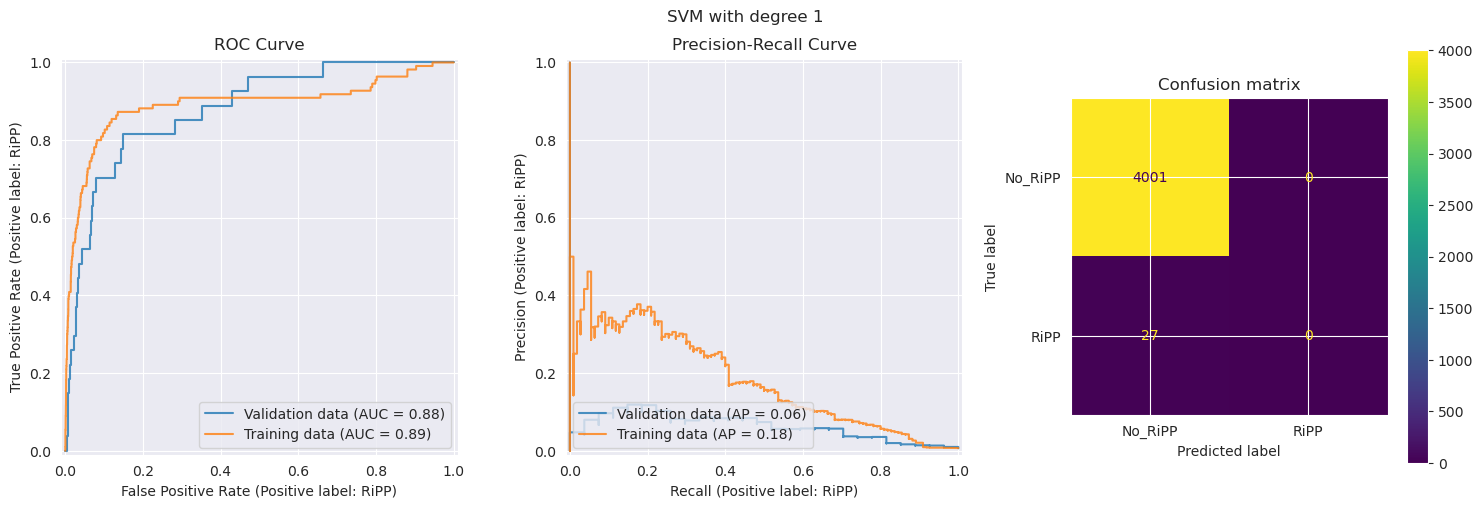

Feature MFYW: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature aliphatic: 0.000 ± 0.000
Feature instability: 0.000 ± 0.000
Feature boman: 0.000 ± 0.000
Feature entropyratio: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature length: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature charge: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature cys_s

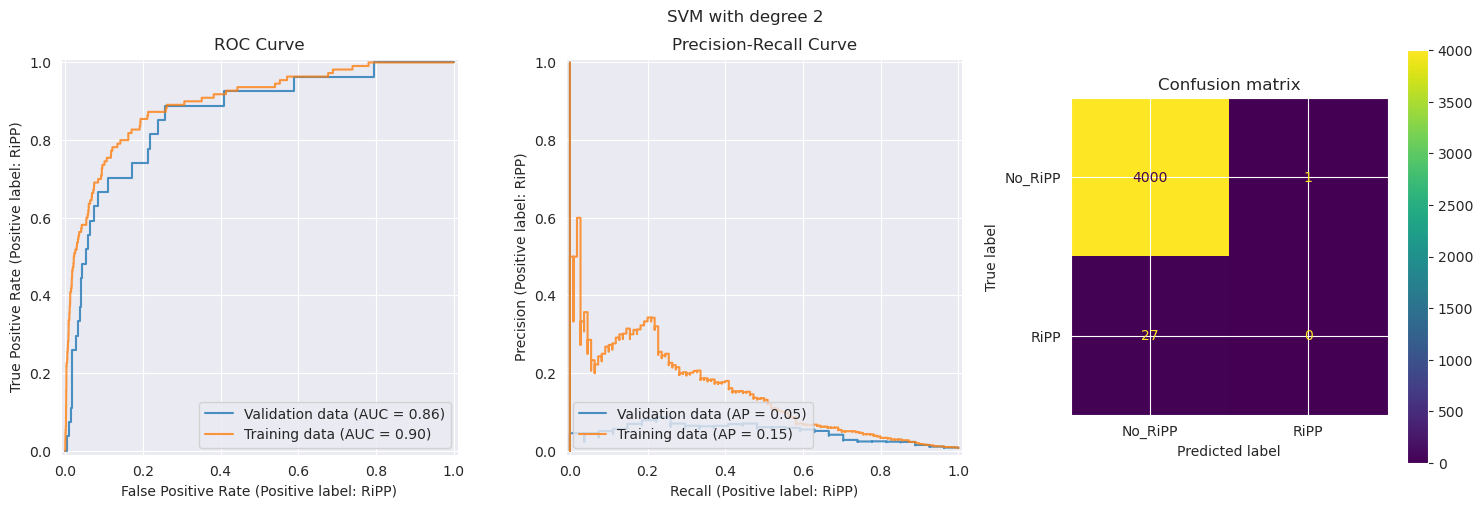

Feature aliphatic: 0.004 ± 0.001
Feature length: 0.001 ± 0.000
Feature instability: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature boman: 0.000 ± 0.000
Feature entropyratio: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature cys_ser30: 0.000 ± 0.000
Feature cy

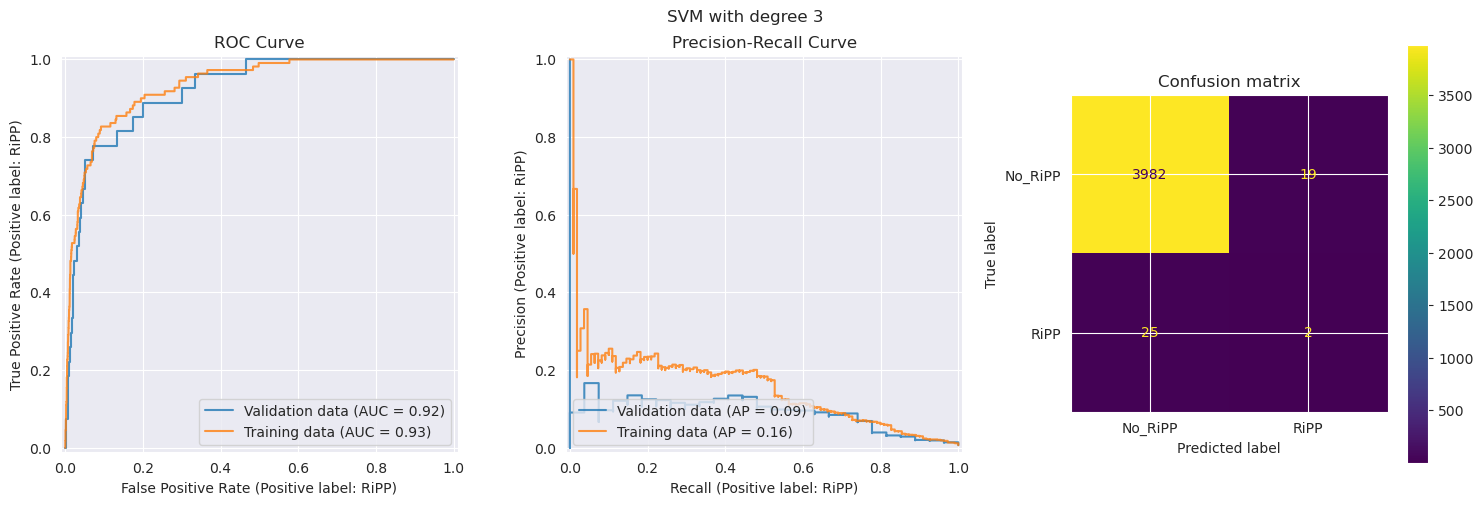

Feature length: 0.018 ± 0.001
Feature aliphatic: 0.010 ± 0.002
Feature instability: 0.009 ± 0.001
Feature charge: 0.003 ± 0.001
Feature SVGER4: 0.000 ± 0.000
Feature boman: 0.000 ± 0.000
Feature ProtFP6: 0.000 ± 0.000
Feature ProtFP2: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature entropyratio: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.

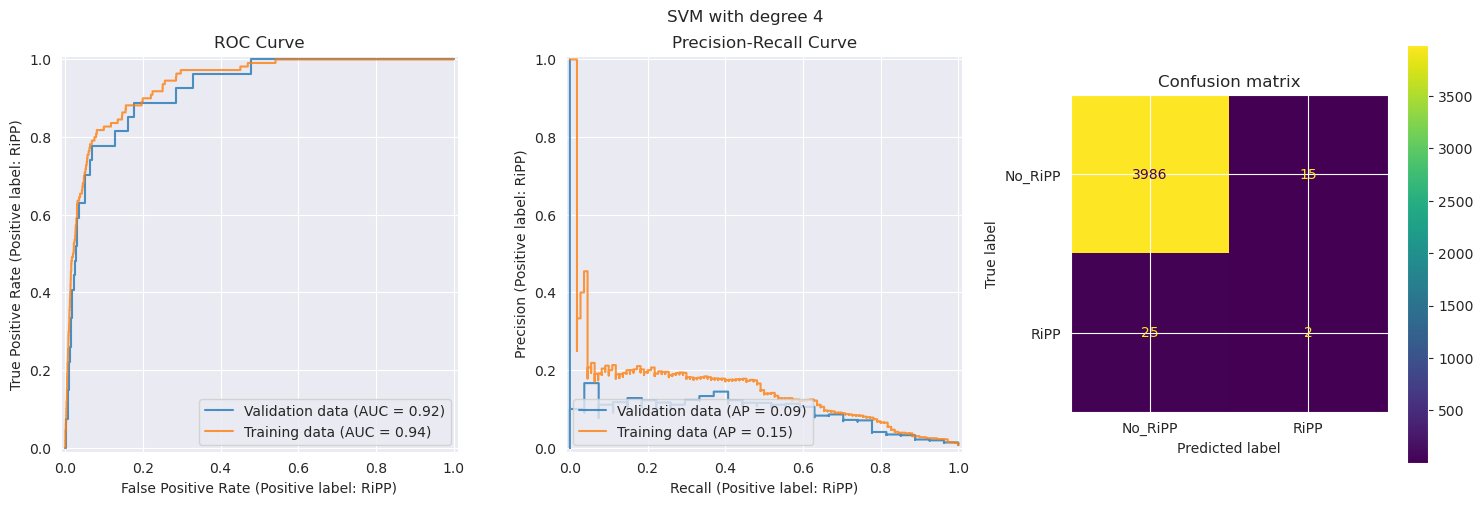

Feature length: 0.012 ± 0.001
Feature instability: 0.010 ± 0.001
Feature aliphatic: 0.004 ± 0.001
Feature charge: 0.003 ± 0.002
Feature SVGER4: 0.000 ± 0.000
Feature KF5: 0.000 ± 0.000
Feature ProtFP7: 0.000 ± 0.000
Feature AF3: 0.000 ± 0.000
Feature Z5: 0.000 ± 0.000
Feature ProtFP5: 0.000 ± 0.000
Feature BLOSUM8: 0.000 ± 0.000
Feature KF9: 0.000 ± 0.000
Feature ProtFP6: 0.000 ± 0.000
Feature AF2: 0.000 ± 0.000
Feature ProtFP8: 0.000 ± 0.000
Feature F2: 0.000 ± 0.000
Feature KF1: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature Z1: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature M: 0.000 ± 

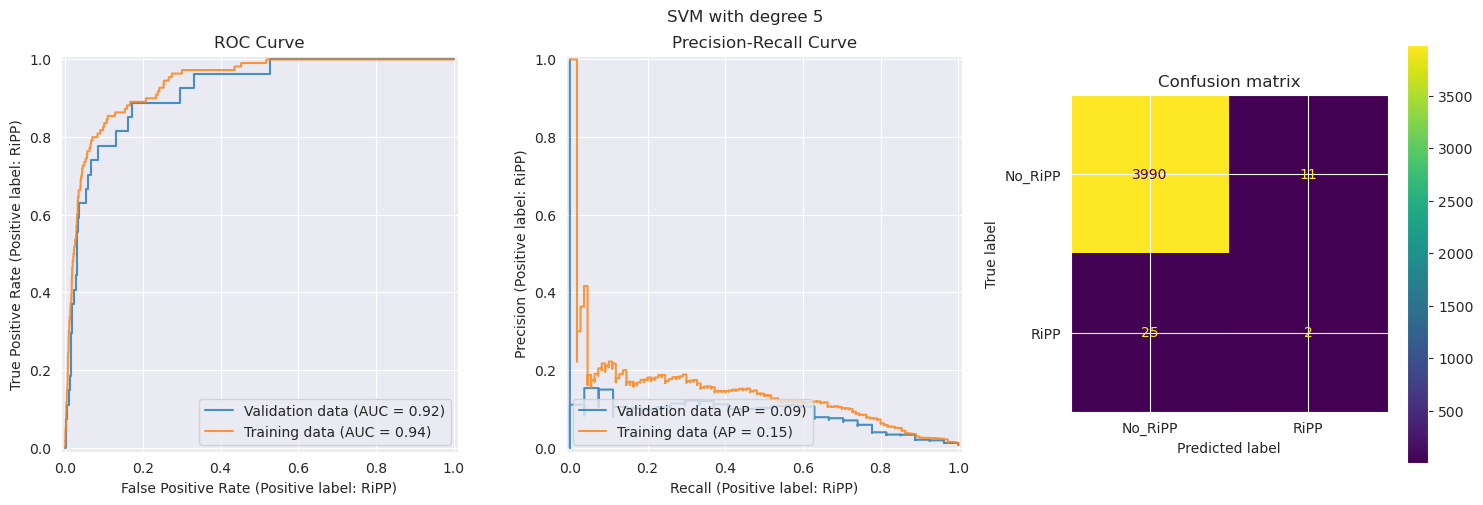

Feature instability: 0.009 ± 0.000
Feature length: 0.007 ± 0.001
Feature charge: 0.002 ± 0.001
Feature aliphatic: 0.001 ± 0.001
Feature PRIN1: 0.000 ± 0.000
Feature SVGER1: 0.000 ± 0.000
Feature ProtFP1: 0.000 ± 0.000
Feature Z4: 0.000 ± 0.000
Feature SVGER7: 0.000 ± 0.000
Feature ProtFP2: 0.000 ± 0.000
Feature PRIN3: 0.000 ± 0.000
Feature PRIN2: 0.000 ± 0.000
Feature PD1: 0.000 ± 0.000
Feature SVGER11: 0.000 ± 0.000
Feature Z2: 0.000 ± 0.000
Feature ProtFP7: 0.000 ± 0.000
Feature SVGER4: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature cys_ser30: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feat

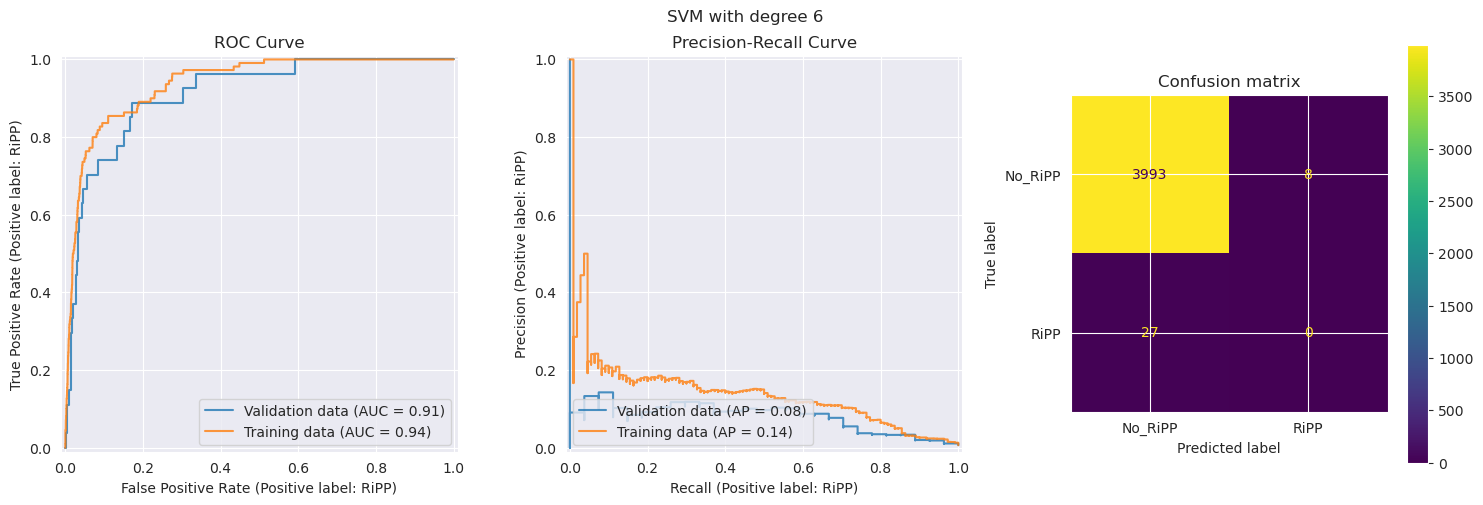

Feature instability: 0.006 ± 0.001
Feature length: 0.004 ± 0.001
Feature charge: 0.001 ± 0.001
Feature aliphatic: 0.001 ± 0.001
Feature PRIN1: 0.000 ± 0.000
Feature SVGER11: 0.000 ± 0.000
Feature ProtFP1: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature boman: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature entropyratio: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.0

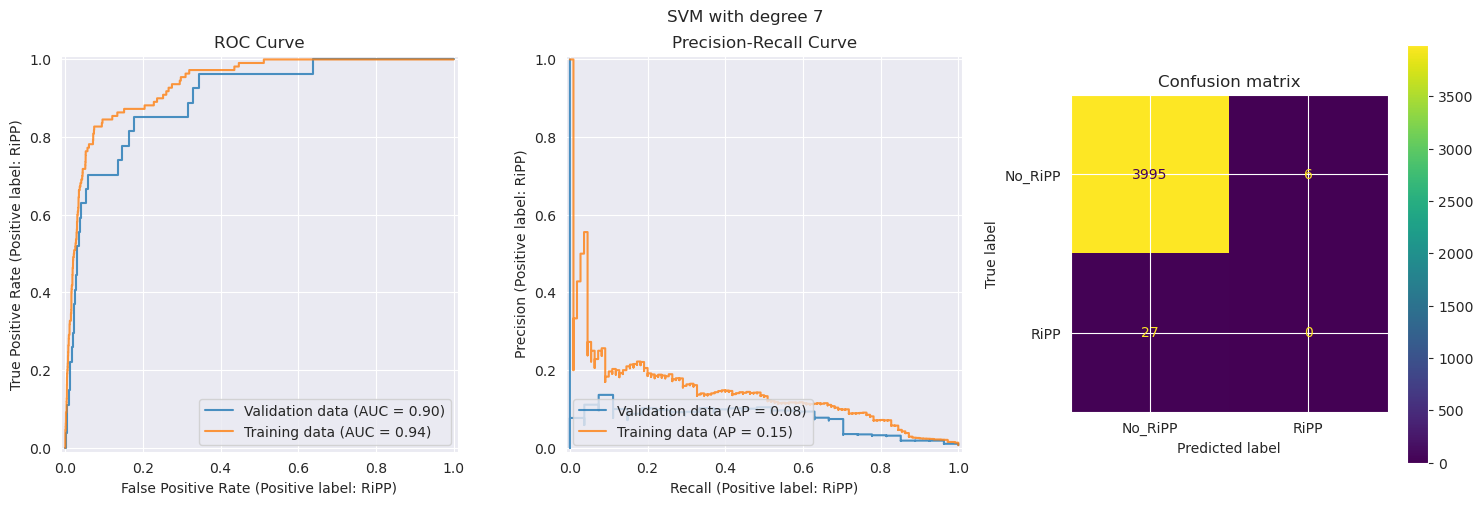

Feature instability: 0.004 ± 0.001
Feature length: 0.003 ± 0.001
Feature aliphatic: 0.002 ± 0.001
Feature charge: 0.001 ± 0.001
Feature PRIN1: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature boman: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature entropyratio: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature c

In [6]:
x_train, x_test, y_train, y_test = svm_training_split_reduced('/lustre/BIF/nobackup/sanz006/training_dataset.csv',feature_list=complete_features)
svc_classification(x_train, x_test, y_train, y_test,feature_list=complete_features)

         No_RiPP  RiPP
No_RiPP     4001     0
RiPP          27     0


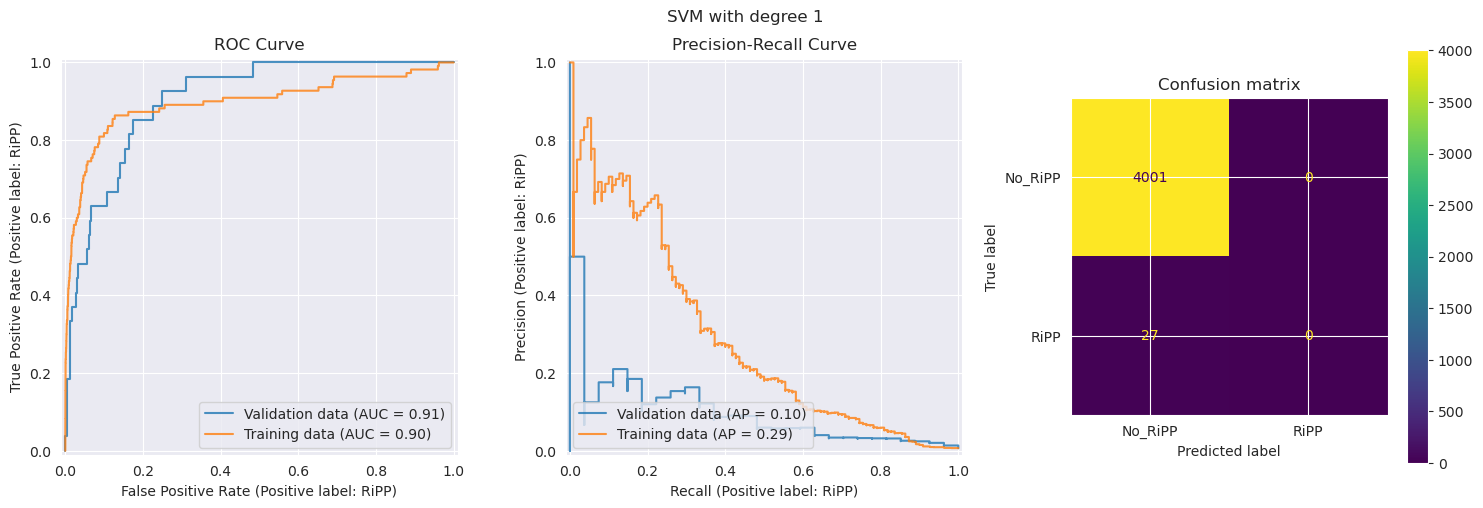

Feature MFYW: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature aliphatic: 0.000 ± 0.000
Feature instability: 0.000 ± 0.000
Feature boman: 0.000 ± 0.000
Feature entropyratio: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature length: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature charge: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature cys_s

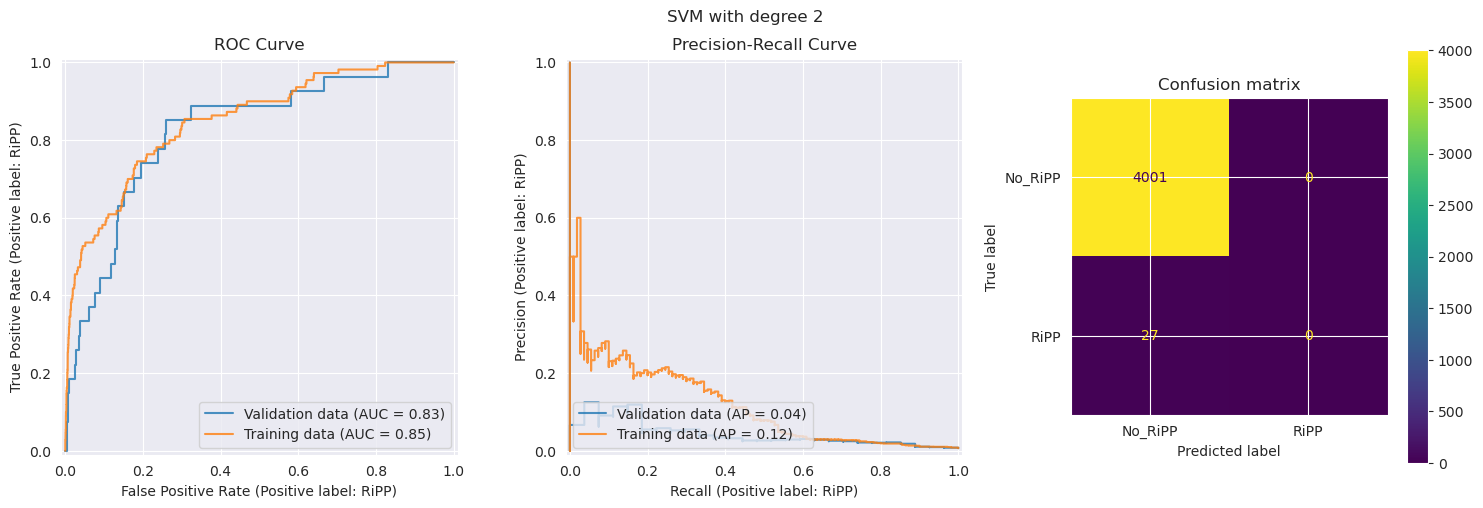

Feature MFYW: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature aliphatic: 0.000 ± 0.000
Feature instability: 0.000 ± 0.000
Feature boman: 0.000 ± 0.000
Feature entropyratio: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature length: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature charge: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature cys_s

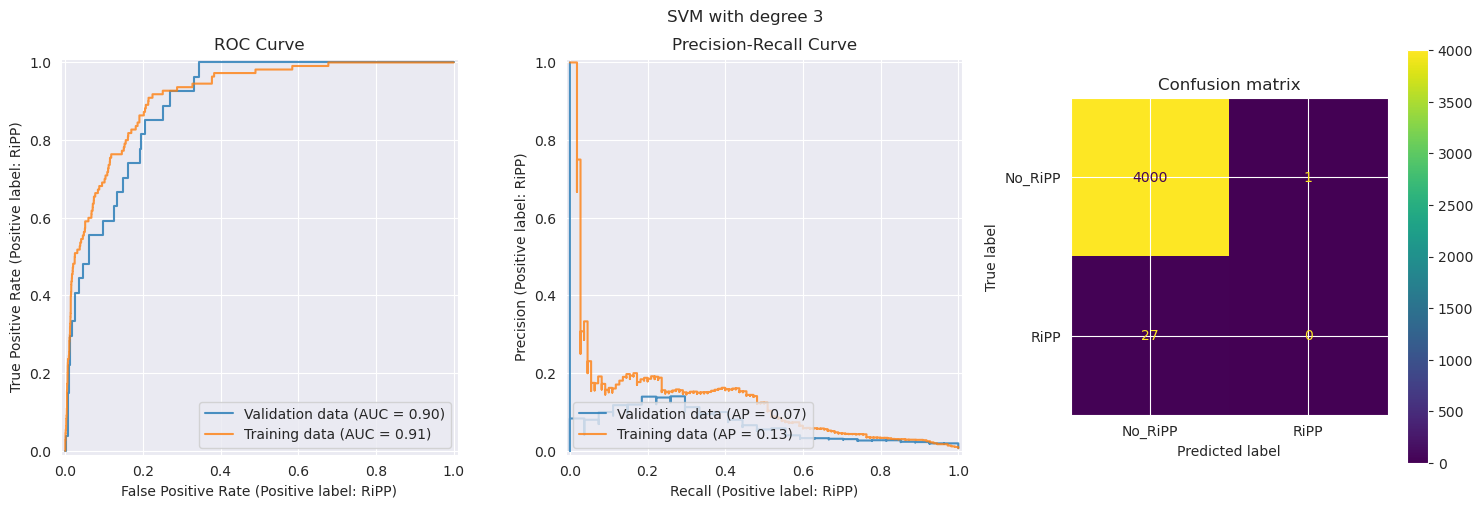

Feature length: 0.006 ± 0.001
Feature instability: 0.004 ± 0.001
Feature charge: 0.004 ± 0.001
Feature aliphatic: 0.001 ± 0.001
Feature MFYW: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature boman: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature entropyratio: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature cys_s

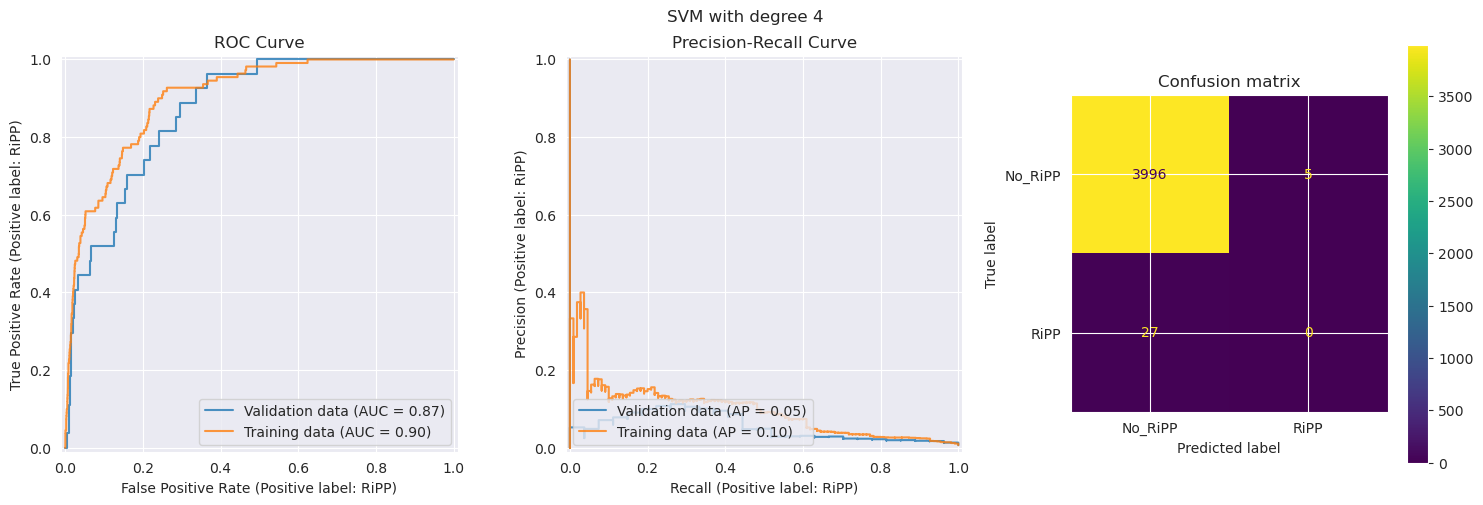

Feature length: 0.012 ± 0.001
Feature instability: 0.011 ± 0.001
Feature charge: 0.006 ± 0.001
Feature aliphatic: 0.001 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature boman: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature entropyratio: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature cys_s

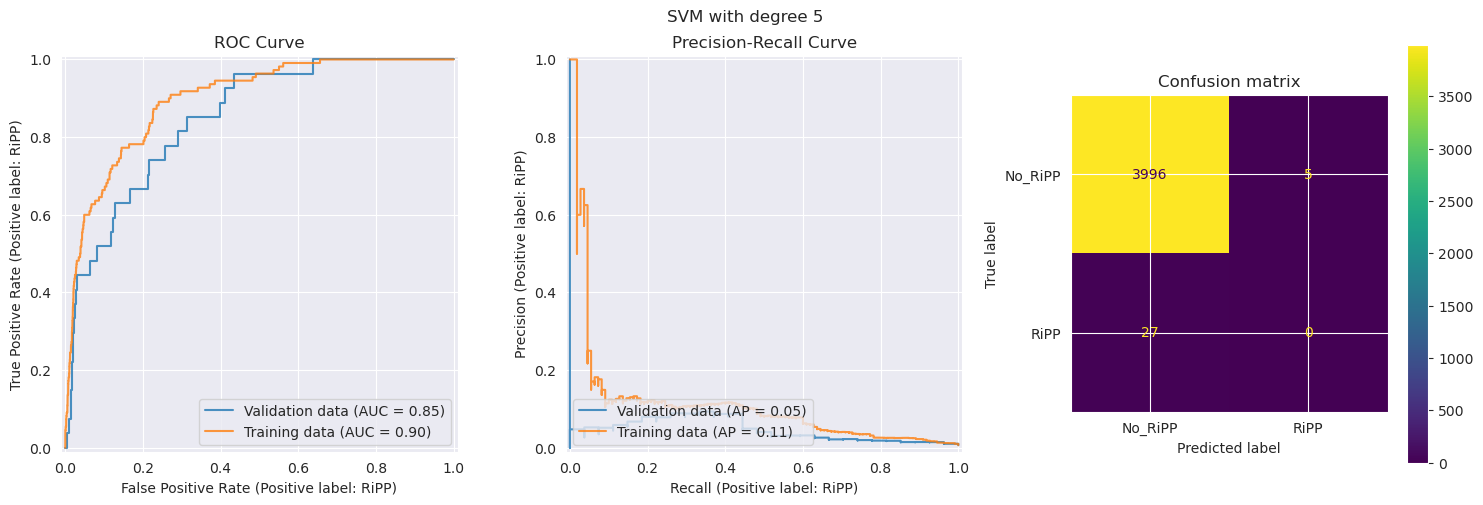

Feature instability: 0.008 ± 0.001
Feature length: 0.006 ± 0.001
Feature charge: 0.004 ± 0.001
Feature aliphatic: 0.000 ± 0.000
Feature entropyratio: 0.000 ± 0.000
Feature boman: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature cys_s

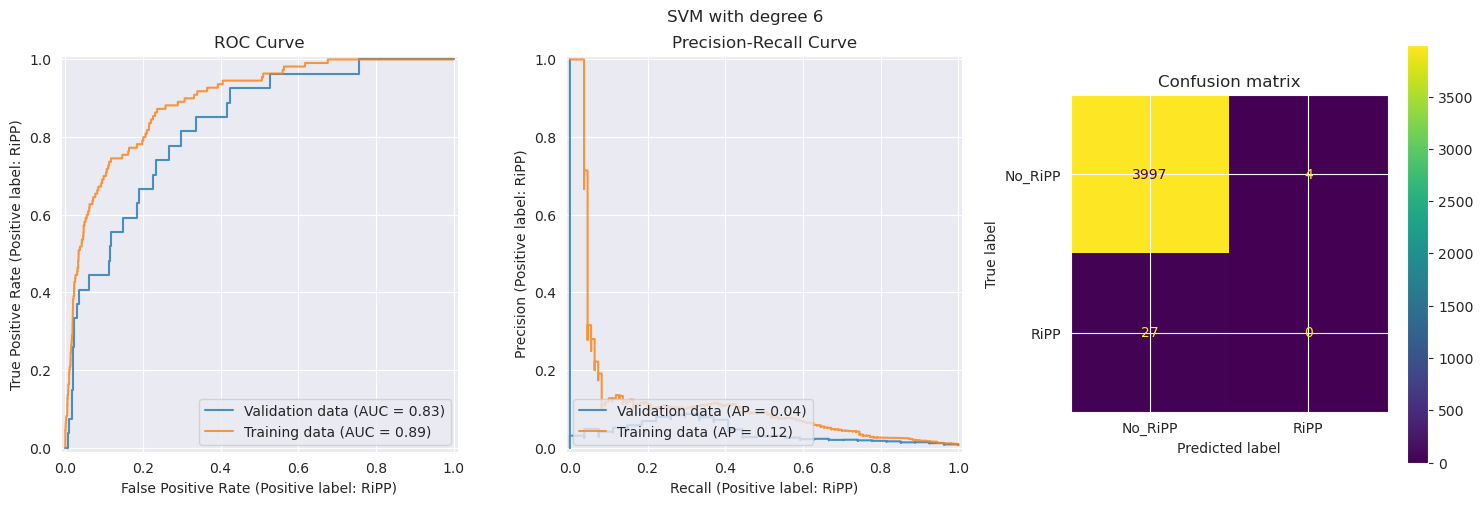

Feature charge: 0.004 ± 0.001
Feature instability: 0.003 ± 0.001
Feature length: 0.003 ± 0.000
Feature aliphatic: 0.001 ± 0.001
Feature boman: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature cys20: 0.000 ± 0.000
Feature cys_ser30: 0

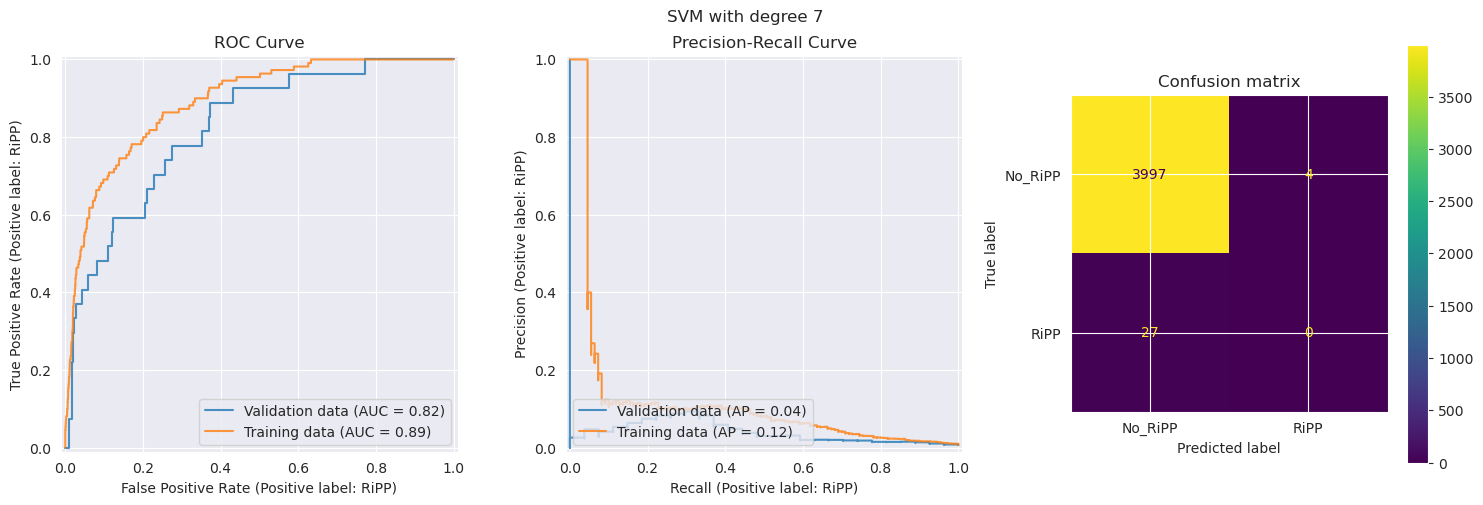

Feature charge: 0.004 ± 0.001
Feature length: 0.003 ± 0.001
Feature instability: 0.002 ± 0.001
Feature aliphatic: 0.002 ± 0.001
Feature boman: 0.000 ± 0.000
Feature AVIL: 0.000 ± 0.000
Feature MFYW: 0.000 ± 0.000
Feature V: 0.000 ± 0.000
Feature RHK: 0.000 ± 0.000
Feature DE: 0.000 ± 0.000
Feature STNQ: 0.000 ± 0.000
Feature CGP: 0.000 ± 0.000
Feature Y: 0.000 ± 0.000
Feature T: 0.000 ± 0.000
Feature W: 0.000 ± 0.000
Feature L: 0.000 ± 0.000
Feature I: 0.000 ± 0.000
Feature H: 0.000 ± 0.000
Feature S: 0.000 ± 0.000
Feature P: 0.000 ± 0.000
Feature F: 0.000 ± 0.000
Feature M: 0.000 ± 0.000
Feature K: 0.000 ± 0.000
Feature D: 0.000 ± 0.000
Feature C: 0.000 ± 0.000
Feature E: 0.000 ± 0.000
Feature Q: 0.000 ± 0.000
Feature G: 0.000 ± 0.000
Feature R: 0.000 ± 0.000
Feature A: 0.000 ± 0.000
Feature N: 0.000 ± 0.000
Feature entropy: 0.000 ± 0.000
Feature entropyratio: 0.000 ± 0.000
Feature avghydrop: 0.000 ± 0.000
Feature avgcharge: 0.000 ± 0.000
Feature cys_ser20: 0.000 ± 0.000
Feature cys_s

In [7]:
x_train, x_test, y_train, y_test = svm_training_split_reduced('/lustre/BIF/nobackup/sanz006/training_dataset.csv',feature_list=original_features)
svc_classification(x_train, x_test, y_train, y_test,feature_list=original_features)

Now we will use fewer features based on the feature importance plots

Feature selection, forward and backwards

In [6]:
def svc_feature_selection(dataset_file,feature_list):
        dataset = pd.read_csv(dataset_file)
        dataset = dataset.drop(labels="sequence", axis=1)
        x = dataset[feature_list]
        y = dataset[["RiPP"]].to_numpy().ravel()
        poly_svc = svm.SVC(C=10,kernel="poly",random_state=0,degree=3,class_weight='balanced')
        #poly_svc.fit(x_train, y_train)
        #f_importances(abs(poly_svc.coef_[0]),feature_list)
        print('Starting sfs')
        sfs = SequentialFeatureSelector(estimator=poly_svc, n_features_to_select='auto',direction='backward',n_jobs=20)
        print('fitting...')
        sfs.fit(x,y)
        print('fitting completed')
        selected_features=sfs.get_params()
        print(selected_features)

In [7]:
svc_feature_selection('/lustre/BIF/nobackup/sanz006/training_dataset.csv',complete_features)

Starting sfs
fitting...


KeyboardInterrupt: 

In [ ]:
x_train, x_test, y_train, y_test = svm_training_split('/lustre/BIF/nobackup/sanz006/training_dataset.csv',feature_list=feature_selection)
svc_classification(x_train, x_test, y_train, y_test,feature_list=feature_selection)